# Proyecto Despliegue de soluciones

In [26]:
# Install python 3.12
#!sudo apt-get update -y
#!sudo apt-get install python3.12

## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb

## EJECUCIÓN UNICA VEZ- TOMA MUESTRAS TODOS LOS MESES 2024

In [ ]:
# Opciones comunes para la carga de archivos
opciones_carga = {
    'sep': ';',
    'encoding': 'latin1',
    'low_memory': False
}

# Cargar los archivos en DataFrames con las opciones especificadas
df_enero = pd.read_csv('Enero.csv', **opciones_carga)
df_enero.columns = df_enero.columns.str.strip().str.lower()  # Eliminar espacios y poner en minúsculas
df_febrero = pd.read_csv('Febrero.csv', **opciones_carga)
df_febrero.columns = df_febrero.columns.str.strip().str.lower()  # Eliminar espacios y poner en minúsculas
df_marzo = pd.read_csv('Marzo.csv', **opciones_carga)
df_marzo.columns = df_marzo.columns.str.strip().str.lower()  # Eliminar espacios y poner en minúsculas
df_abril = pd.read_csv('Abril.csv', **opciones_carga)
df_abril.columns = df_abril.columns.str.strip().str.lower()
df_mayo = pd.read_csv('Mayo.csv', **opciones_carga)
df_mayo.columns = df_mayo.columns.str.strip().str.lower()
df_junio = pd.read_csv('Junio.csv', **opciones_carga)
df_junio.columns = df_junio.columns.str.strip().str.lower()
df_julio = pd.read_csv('Julio.csv', **opciones_carga)
df_julio.columns = df_julio.columns.str.strip().str.lower()
df_agosto = pd.read_csv('Agosto.csv', **opciones_carga)
df_agosto.columns = df_agosto.columns.str.strip().str.lower()
df_sept = pd.read_csv('Septiembre.csv', **opciones_carga)
df_sept.columns = df_sept.columns.str.strip().str.lower()
df_oct = pd.read_csv('Octubre.csv', **opciones_carga)
df_oct.columns = df_oct.columns.str.strip().str.lower()
df_nov = pd.read_csv('Noviembre.csv', **opciones_carga)
df_nov.columns = df_nov.columns.str.strip().str.lower()
df_dic = pd.read_csv('Diciembre.csv', **opciones_carga)
df_dic.columns = df_dic.columns.str.strip().str.lower()

muestraEnero = df_enero.sample(n=69000, random_state=42)  # random_state asegura reproducibilidad
muestraFebrero = df_febrero.sample(n=69000, random_state=42)
muestraMarzo = df_marzo.sample(n=69000, random_state=42)
muestraAbril = df_abril.sample(n=69000, random_state=42)
muestraMayo = df_mayo.sample(n=69000, random_state=42)
muestraJunio = df_junio.sample(n=69000, random_state=42)
muestraJulio = df_julio.sample(n=69000, random_state=42)
muestraAgosto = df_agosto.sample(n=69000, random_state=42)
muestraSept = df_sept.sample(n=69000, random_state=42)
muestraOct = df_oct.sample(n=69000, random_state=42)
muestraNov = df_nov.sample(n=69000, random_state=42)
muestraDic = df_dic.sample(n=69000, random_state=42)

# Combinar los DataFrames en uno solo
df_total = pd.concat([muestraEnero,muestraFebrero,muestraMarzo,muestraAbril,muestraMayo,muestraJunio,muestraJulio,muestraAgosto,muestraSept,muestraOct,muestraNov,muestraDic], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
df_total.head()

In [ ]:
df_total.columns

Index(['fech', 'adua', 'paisgen', 'paispro', 'paiscom', 'deptodes', 'viatrans',
       'bandera', 'regimen', 'acuerdo', 'pbk', 'pnk', 'canu', 'coda', 'naban',
       'vafodo', 'flete', 'vacid', 'vacip', 'imp1', 'otder', 'clase',
       'cuidaimp', 'cuidaexp', 'actecon', 'codadad', 'vadua', 'vrajus',
       'baseiva', 'otrosp', 'otrosbase', 'totalivayo', 'seguros', 'otrosg',
       'luin', 'codluin', 'depim', 'copaex', 'tipoim', 'porara', 'derel',
       'ï»¿fech'],
      dtype='object')

In [ ]:
df_total.shape

(828000, 42)

In [ ]:
df_total[''].unique()

array([  nan, 2407., 2408., 2409., 2410., 2411., 2412.])

In [ ]:
df_filtrado1 = df_total[df_total['ï»¿fech'].isna()]
df_filtrado1

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel,ï»¿fech
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,"2,39",0,Bogota,BOG,11,628,1,0,0,NaN
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,"8,33",0,Cartagena,CTG,11,827,1,10,5376000,NaN
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,"0,23",0,Riohacha,RCH,11,249,99,5,377000,NaN
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,"0,39","33,34",Buenaventura,BUN,11,215,99,10,1303000,NaN
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,"0,4",0,Bogota,BOG,11,767,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413995,2406.0,90,190,190,190,5,1,169,C100,NaN,...,"0,07","0,39",Buenaventura,BUN,5,190,1,0,0,NaN
413996,2406.0,3,215,386,386,11,3,169,C200,NaN,...,"0,21","0,00",Bogota,BOG,11,386,1,0,0,NaN
413997,2406.0,1,215,215,215,76,3,741,C200,NaN,...,"0,43","0,00",Armenia,AXM,76,215,1,15,176000,NaN
413998,2406.0,3,245,245,573,25,4,245,C100,124.0,...,"0,07","0,00",Bogota,BOG,25,573,1,0,0,NaN


In [ ]:
df_filtrado2 = df_total[df_total['ï»¿fech'].notna()]
df_filtrado2

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel,ï»¿fech
414000,NaN,3,249,249,249,25,4,169,C100,NaN,...,"0,13",0,Bogota,BOG,25,249,1,0,0,2407.0
414001,NaN,35,215,215,573,5,1,434,C100,NaN,...,"15,94",0,Buenaventura,BUN,5,573,1,0,0,2407.0
414002,NaN,48,493,249,249,5,1,221,C100,NaN,...,"1,32",0,Cartagena,CTG,5,249,1,5,462000,2407.0
414003,NaN,3,215,215,271,11,4,580,C100,NaN,...,"0,19",0,Bogota,BOG,11,271,1,0,0,2407.0
414004,NaN,3,399,249,249,68,4,249,C100,NaN,...,"30,27","65,7",Bogota,BOG,68,249,1,0,0,2407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,NaN,48,670,670,275,5,1,467,C184,NaN,...,"0,02",0,Cartagena,CTG,5,275,1,0,0,2412.0
827996,NaN,35,215,215,249,5,1,741,C100,NaN,...,"24,65","137,68",Buenaventura,BUN,8,249,1,0,0,2412.0
827997,NaN,35,215,215,215,17,1,434,C102,NaN,...,"3,18",0,Buenaventura,BUN,11,215,1,10,4162000,2412.0
827998,NaN,3,245,245,245,5,4,169,C100,NaN,...,"0,73",0,Bogota,BOG,5,245,1,5,247000,2412.0


In [ ]:
df_filtrado1 = df_filtrado1.drop(columns=['ï»¿fech'])
df_filtrado1

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,totalivayo,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,0,"2,39",0,Bogota,BOG,11,628,1,0,0
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,16611000,"8,33",0,Cartagena,CTG,11,827,1,10,5376000
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,1881000,"0,23",0,Riohacha,RCH,11,249,99,5,377000
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,4025000,"0,39","33,34",Buenaventura,BUN,11,215,99,10,1303000
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,960000,"0,4",0,Bogota,BOG,11,767,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413995,2406.0,90,190,190,190,5,1,169,C100,NaN,...,90000,"0,07","0,39",Buenaventura,BUN,5,190,1,0,0
413996,2406.0,3,215,386,386,11,3,169,C200,NaN,...,940000,"0,21","0,00",Bogota,BOG,11,386,1,0,0
413997,2406.0,1,215,215,215,76,3,741,C200,NaN,...,433000,"0,43","0,00",Armenia,AXM,76,215,1,15,176000
413998,2406.0,3,245,245,573,25,4,245,C100,124.0,...,541000,"0,07","0,00",Bogota,BOG,25,573,1,0,0


In [ ]:
df_filtrado2 = df_filtrado2.drop(columns=['fech'])
df_filtrado2.rename(columns={'ï»¿fech': 'fech'}, inplace=True)

df_filtrado2

,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,pbk,...,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel,fech
414000,3,249,249,249,25,4,169,C100,NaN,"222,23",...,"0,13",0,Bogota,BOG,25,249,1,0,0,2407.0
414001,35,215,215,573,5,1,434,C100,NaN,"21.000,00",...,"15,94",0,Buenaventura,BUN,5,573,1,0,0,2407.0
414002,48,493,249,249,5,1,221,C100,NaN,"86,24",...,"1,32",0,Cartagena,CTG,5,249,1,5,462000,2407.0
414003,3,215,215,271,11,4,580,C100,NaN,"38,78",...,"0,19",0,Bogota,BOG,11,271,1,0,0,2407.0
414004,3,399,249,249,68,4,249,C100,NaN,"24,43",...,"30,27","65,7",Bogota,BOG,68,249,1,0,0,2407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,48,670,670,275,5,1,467,C184,NaN,"88,62",...,"0,02",0,Cartagena,CTG,5,275,1,0,0,2412.0
827996,35,215,215,249,5,1,741,C100,NaN,"1809,33",...,"24,65","137,68",Buenaventura,BUN,8,249,1,0,0,2412.0
827997,35,215,215,215,17,1,434,C102,NaN,"6604,07",...,"3,18",0,Buenaventura,BUN,11,215,1,10,4162000,2412.0
827998,3,245,245,245,5,4,169,C100,NaN,"2,77",...,"0,73",0,Bogota,BOG,5,245,1,5,247000,2412.0


In [ ]:
df_totalu= pd.concat([df_filtrado1, df_filtrado2], ignore_index=True)  # ignore_index reindexa los datos
df_totalu

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,totalivayo,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,0,"2,39",0,Bogota,BOG,11,628,1,0,0
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,16611000,"8,33",0,Cartagena,CTG,11,827,1,10,5376000
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,1881000,"0,23",0,Riohacha,RCH,11,249,99,5,377000
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,4025000,"0,39","33,34",Buenaventura,BUN,11,215,99,10,1303000
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,960000,"0,4",0,Bogota,BOG,11,767,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,2412.0,48,670,670,275,5,1,467,C184,NaN,...,245000,"0,02",0,Cartagena,CTG,5,275,1,0,0
827996,2412.0,35,215,215,249,5,1,741,C100,NaN,...,25705000,"24,65","137,68",Buenaventura,BUN,8,249,1,0,0
827997,2412.0,35,215,215,215,17,1,434,C102,NaN,...,6451000,"3,18",0,Buenaventura,BUN,11,215,1,10,4162000
827998,2412.0,3,245,245,245,5,4,169,C100,NaN,...,1231000,"0,73",0,Bogota,BOG,5,245,1,5,247000


In [ ]:
df_totalu.shape
#df_enero.columns

(828000, 41)


## Análisis del procesamiento de datos de importación

1. Se realizó la carga de datos de importación mensuales de 2024 desde archivos CSV individuales.
2. De cada archivo mensual se tomó una muestra aleatoria de 69,000 registros para mantener un tamaño manejable.
3. Se concatenaron las muestras mensuales en un único DataFrame.
4. Se detectaron y corrigieron problemas con las columnas de fecha (ï»¿fech y fech).
5. Los datos fueron exportados a un archivo CSV consolidado "Importaciones2024.csv".
6. En el procesamiento posterior:
    - Se realizó limpieza de datos numéricos eliminando puntos y reemplazando comas por decimales
    - Se identificaron y eliminaron columnas numéricas con suma total igual a cero
    - Se verificó la completitud de datos mediante visualización de matriz de valores faltantes

In [ ]:
df_totalu.to_csv("Importaciones2024.csv", index=False)

## EJECUCIÓNES RECURENTES

In [2]:
dfimp24 = pd.read_csv("Importaciones2024.csv")

C:\Users\joabo\AppData\Local\Temp\ipykernel_13644\2683592436.py:1: DtypeWarning: Columns (18,19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dfimp24 = pd.read_csv("Importaciones2024.csv")


In [7]:
print("\n*** Información general del dataset:")
print(dfimp24.info())

print("\n*** Descripción de las variables numericas del dataset:")
print(dfimp24.describe())


*** Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828000 entries, 0 to 827999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fech        828000 non-null  float64
 1   adua        828000 non-null  int64  
 2   paisgen     828000 non-null  int64  
 3   paispro     828000 non-null  int64  
 4   paiscom     828000 non-null  int64  
 5   deptodes    828000 non-null  int64  
 6   viatrans    828000 non-null  int64  
 7   bandera     828000 non-null  int64  
 8   regimen     828000 non-null  object 
 9   acuerdo     123077 non-null  float64
 10  pbk         828000 non-null  object 
 11  pnk         828000 non-null  object 
 12  canu        828000 non-null  object 
 13  coda        828000 non-null  object 
 14  naban       828000 non-null  int64  
 15  vafodo      828000 non-null  object 
 16  flete       828000 non-null  object 
 17  vacid       828000 non-null  object 
 18  vacip 

In [8]:
 ## REEMPLAZO TODOS LOS PUNTOS POR '' EN COPY
columnas = ['pbk','pnk','naban','canu', 'vafodo', 'flete', 'vacid','vacip', 'vadua', 'vrajus', 'baseiva', 'totalivayo', 'seguros', 'otrosg','porara']
for columna in columnas:
  dfimp24[columna] = dfimp24[columna].astype(str).str.replace('.', '', regex=False)

for columna in columnas:
    # Limpia espacios, reemplaza comas por puntos y gestiona cadenas vacías
    dfimp24[columna] = dfimp24[columna].str.strip().replace('', np.nan)

 ## REEMPLAZO - POR nan EN COPY
columnas = ['pbk','pnk','naban','canu', 'vafodo', 'flete', 'vacid','vacip', 'vadua', 'vrajus', 'baseiva', 'totalivayo', 'seguros', 'otrosg','porara']
for columna in columnas:
  dfimp24[columna] = dfimp24[columna].astype(str).str.strip().replace(r'^-$', np.nan, regex=True)

for column in columnas:
    dfimp24[column] = dfimp24[column].str.strip().replace(',', '.', regex=True).astype(float) #.str.replace(',', '.', regex=False)

In [9]:
print("\n*** Información general del dataset:")
print(dfimp24.info())

print("\n*** Descripción de las variables numericas del dataset:")
print(dfimp24.describe())


*** Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828000 entries, 0 to 827999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fech        828000 non-null  float64
 1   adua        828000 non-null  int64  
 2   paisgen     828000 non-null  int64  
 3   paispro     828000 non-null  int64  
 4   paiscom     828000 non-null  int64  
 5   deptodes    828000 non-null  int64  
 6   viatrans    828000 non-null  int64  
 7   bandera     828000 non-null  int64  
 8   regimen     828000 non-null  object 
 9   acuerdo     123077 non-null  float64
 10  pbk         827999 non-null  float64
 11  pnk         827999 non-null  float64
 12  canu        828000 non-null  float64
 13  coda        828000 non-null  object 
 14  naban       828000 non-null  float64
 15  vafodo      827989 non-null  float64
 16  flete       827666 non-null  float64
 17  vacid       828000 non-null  float64
 18  vacip 

In [10]:
df_numeric = dfimp24.select_dtypes(include=[np.number])

# Crear una lista para almacenar los nombres de las columnas numéricas donde la suma es cero
columnas_numericas_con_suma_cero = [column for column in df_numeric if df_numeric[column].sum() == 0]

# Imprimir las columnas encontradas
print("Columnas numéricas con suma de valores igual a cero:", columnas_numericas_con_suma_cero)

dfimp24.drop(columns=columnas_numericas_con_suma_cero, inplace=True)

Columnas numéricas con suma de valores igual a cero: ['otder', 'otrosp', 'otrosbase']


Podemos descartar estas columnas del dataframe, ya que no nos aportan información, sus valores son cero.

In [11]:
dfimp24.head()

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,totalivayo,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,0.0,2.39,0.00,Bogota,BOG,11,628,1,0.0,0
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,16611000.0,8.33,0.00,Cartagena,CTG,11,827,1,10.0,5376000
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,1881000.0,0.23,0.00,Riohacha,RCH,11,249,99,5.0,377000
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,4025000.0,0.39,33.34,Buenaventura,BUN,11,215,99,10.0,1303000
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,960000.0,0.40,0.00,Bogota,BOG,11,767,1,0.0,0


<Axes: >

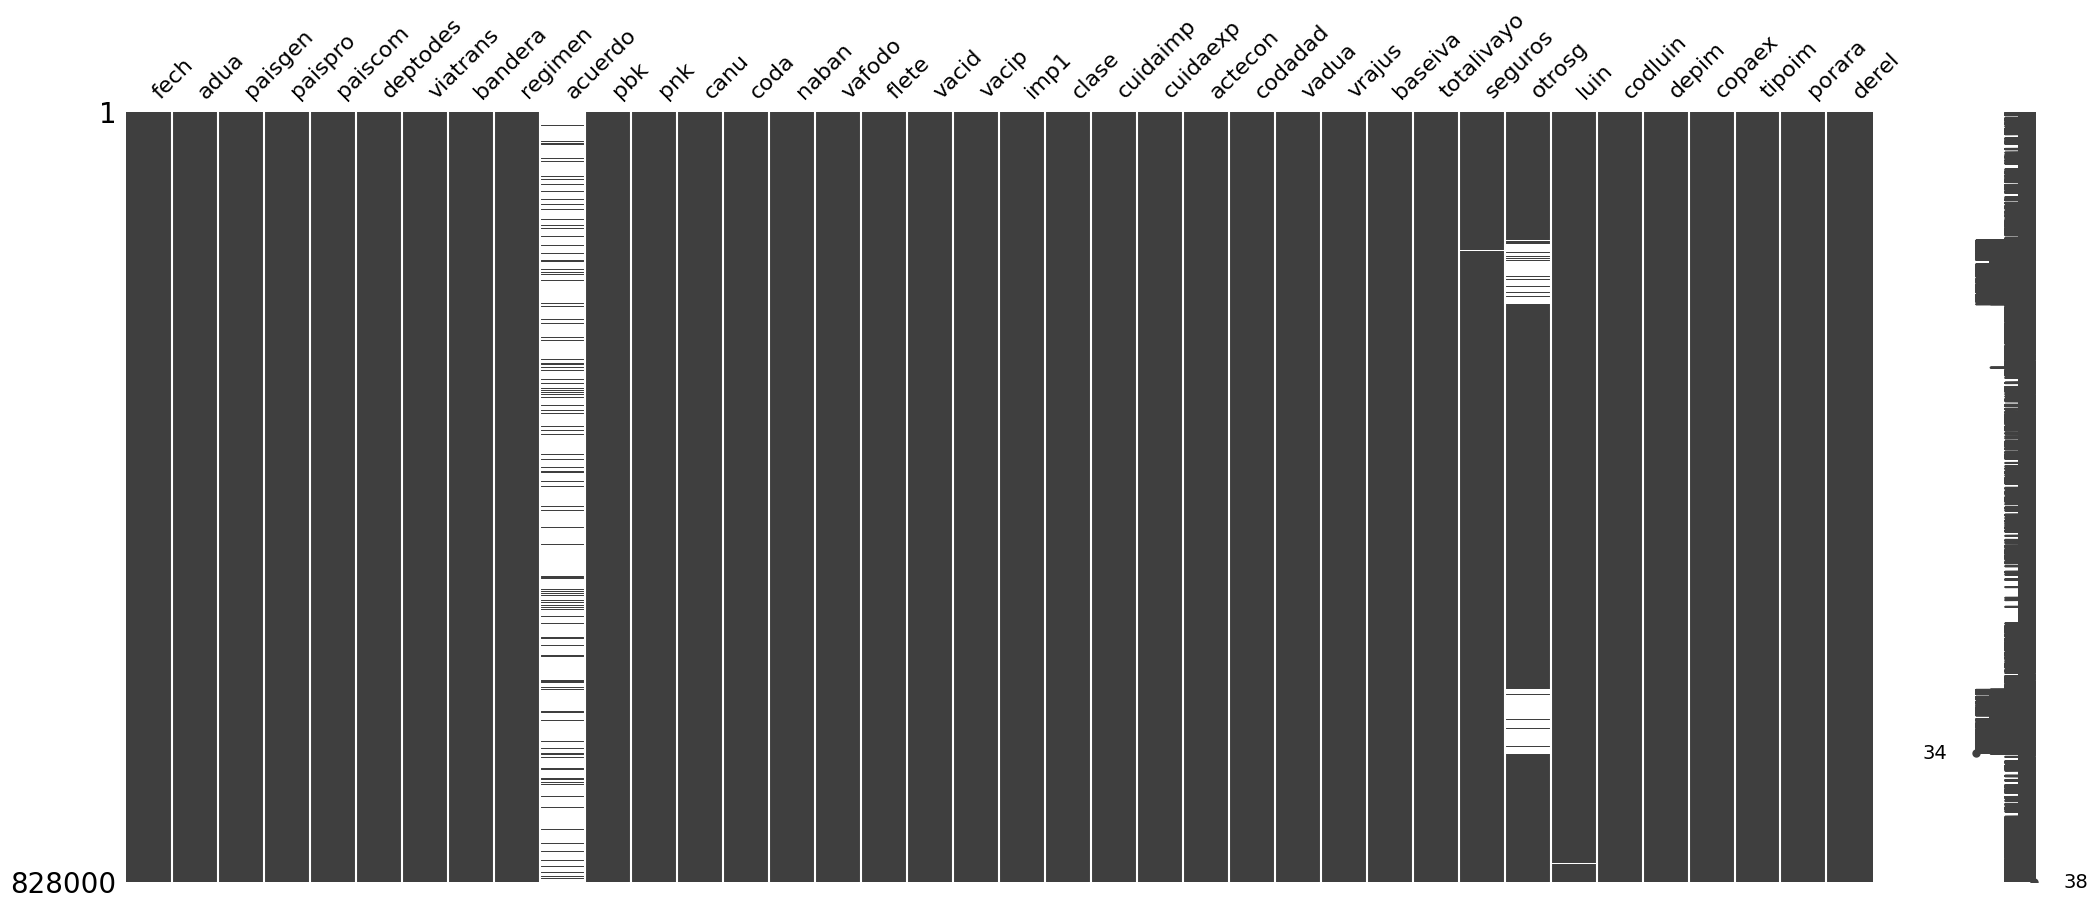

In [12]:
msno.matrix(dfimp24)

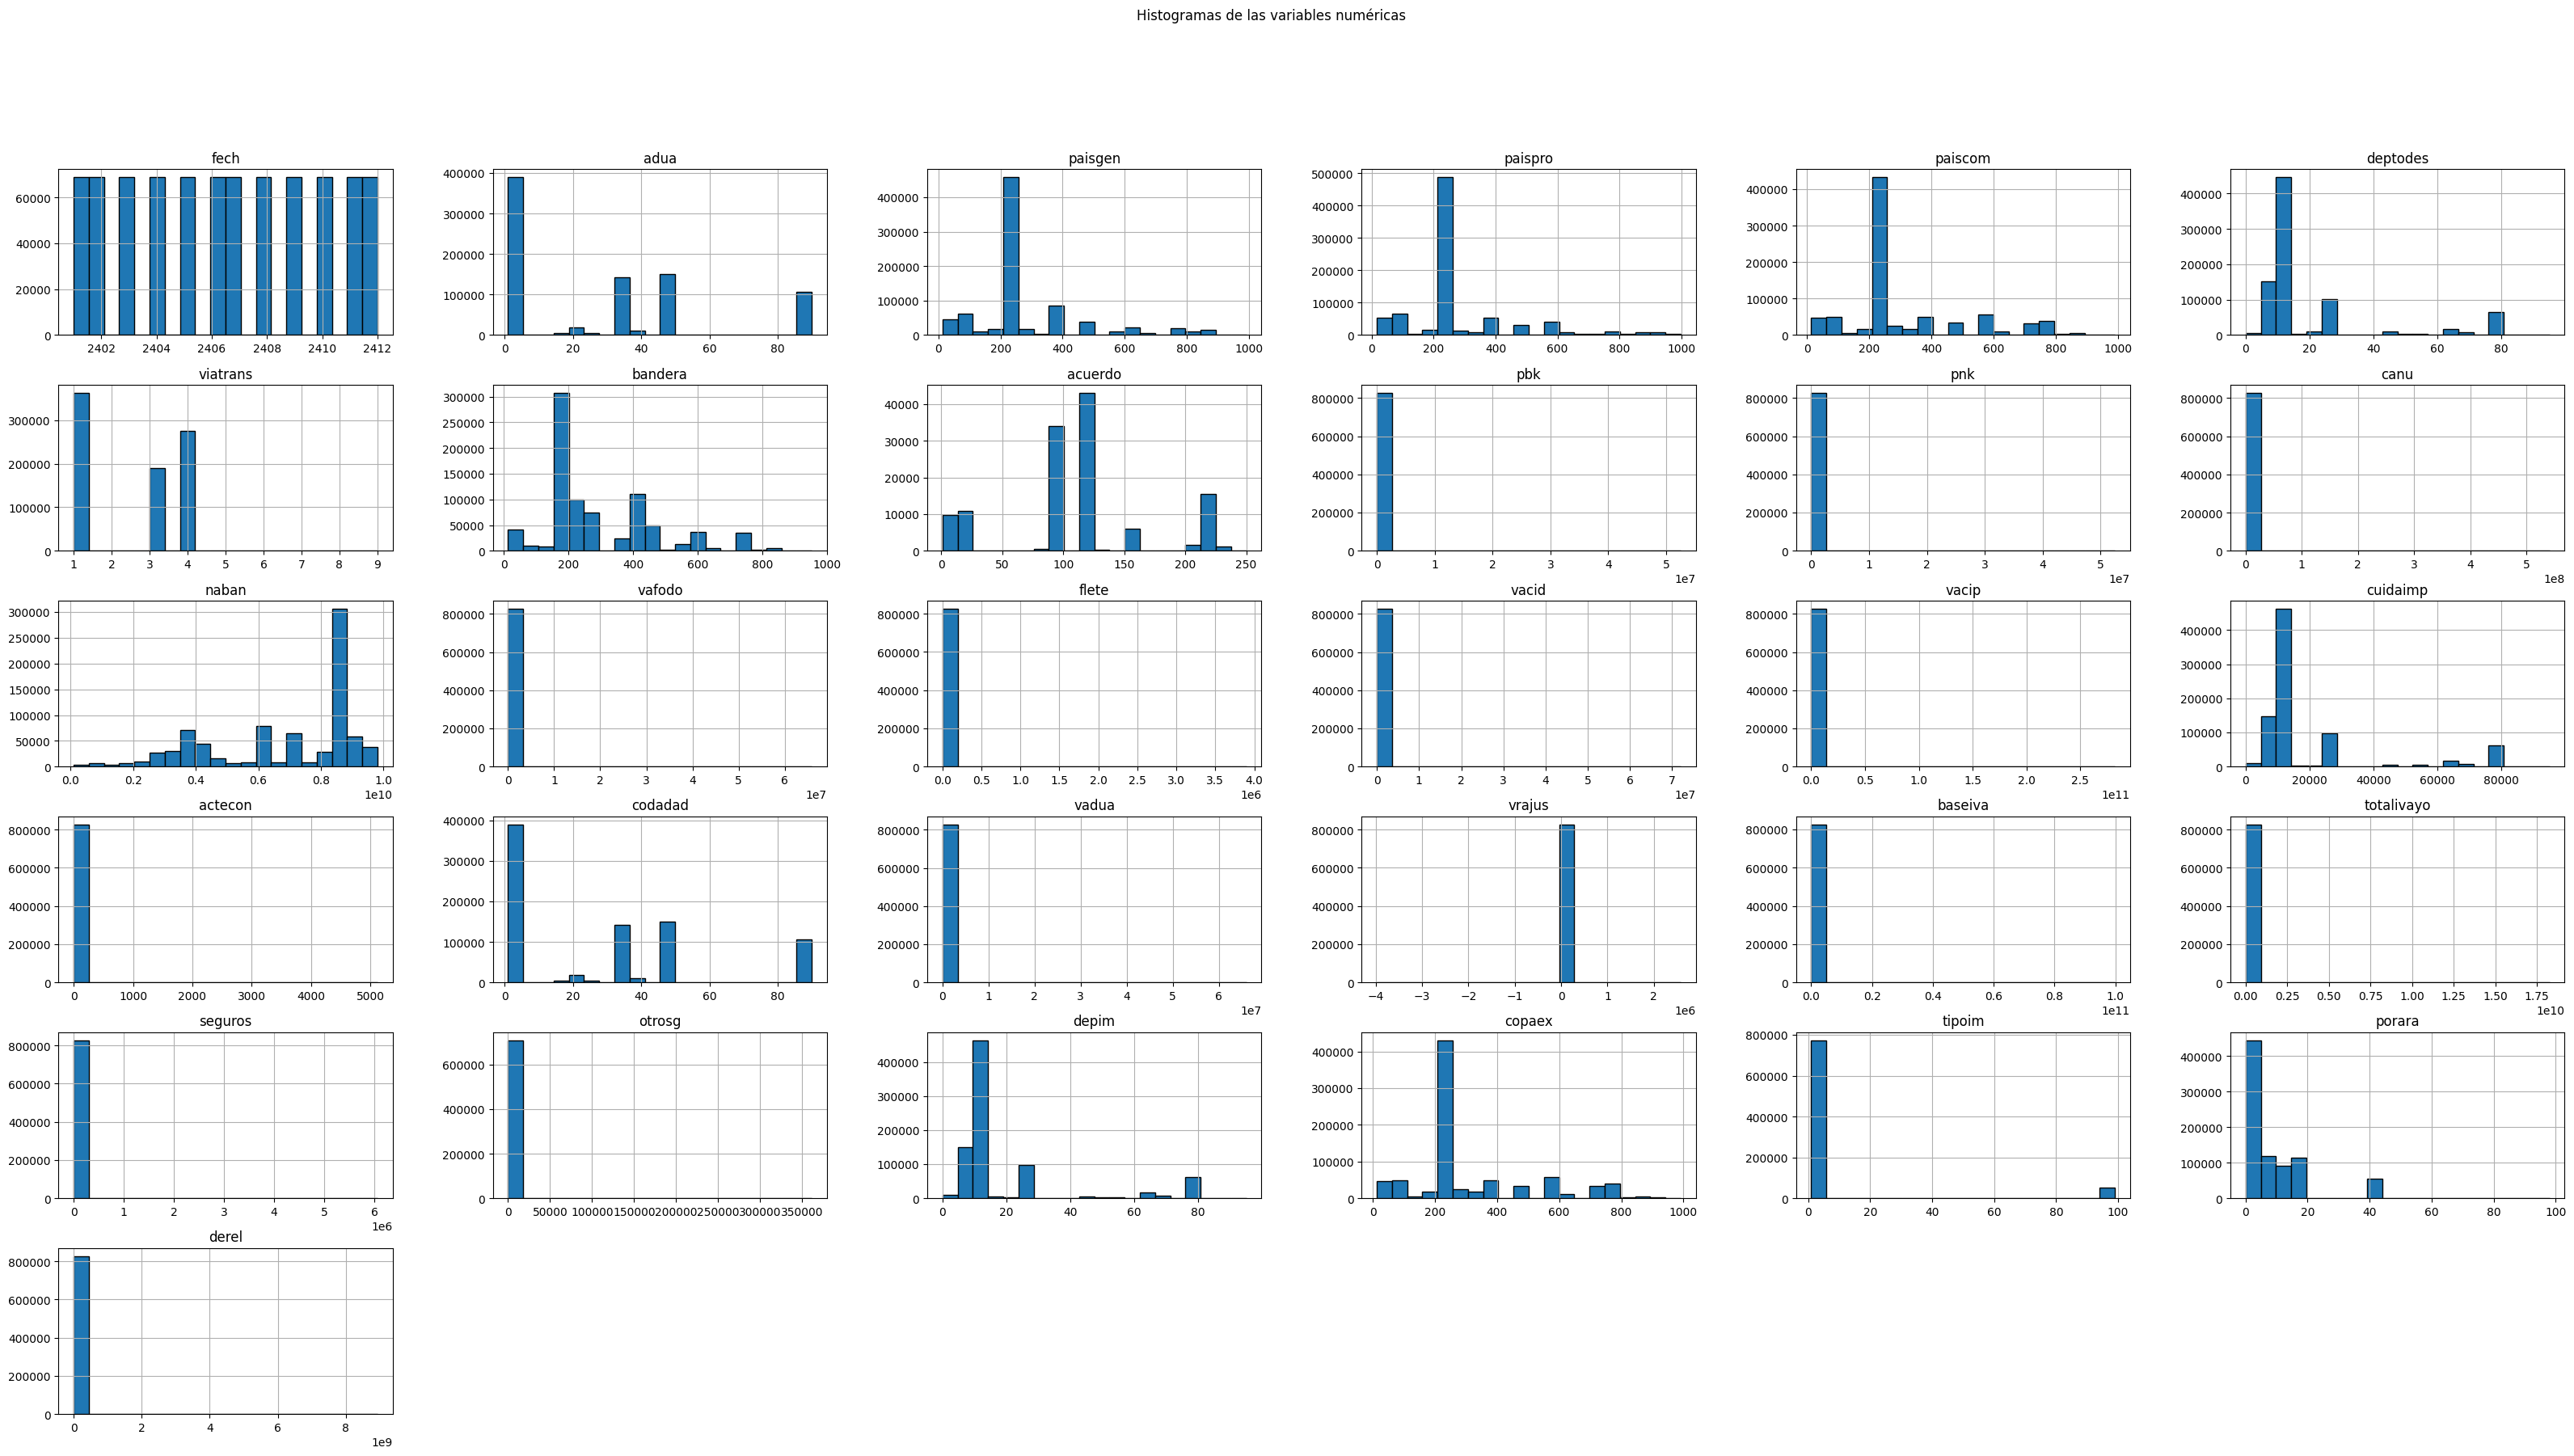

In [13]:
# Visualización de histogramas para variables numéricas
dfimp24.hist(figsize=(40, 20), bins=20, edgecolor='black')
plt.suptitle("Histogramas de las variables numéricas")
plt.show()

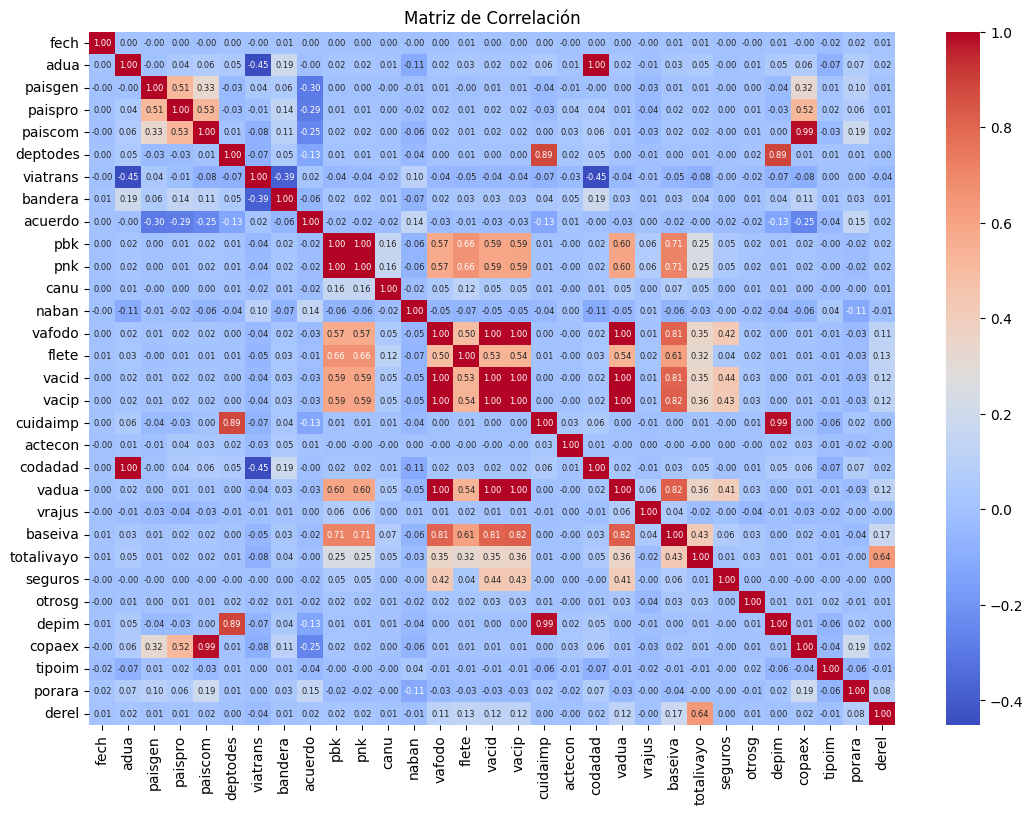

In [14]:
# Matriz de correlación
correlation_matrix = dfimp24.corr(numeric_only=True)
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6})
plt.title("Matriz de Correlación")
plt.show()

In [15]:
# Eliminación de columnas según análisis previo

dfimp24.drop(columns='acuerdo', inplace=True) #por la cantidad de datos faltantes, es mejor eliminarla
dfimp24.drop(columns='pnk', inplace=True) #Eliminamos por correlación perfecta con peso bruta

dfimp24.drop(columns='vafodo', inplace=True) #Eliminamos por correlación con vacid y vacip es la conversión en su moneda (mismo valor)
dfimp24.drop(columns='vacip', inplace=True)

dfimp24.drop(columns='cuidaimp', inplace=True) # eliminar por relación perfecta con departamento de importación
dfimp24.drop(columns='depim', inplace=True)
dfimp24.drop(columns='deptodes', inplace=True)
dfimp24.drop(columns='cuidaexp', inplace=True)

dfimp24.drop(columns='bandera', inplace=True)

dfimp24.drop(columns='codadad', inplace=True) #nos quedamos con Adua codigo de la aduana

dfimp24.drop(columns='luin', inplace=True) #se eliminan por granularidad, iremos directo por país
dfimp24.drop(columns='codluin', inplace=True)

dfimp24.drop(columns='paiscom', inplace=True) # se elimina por relación perfecta con copaex

dfimp24.drop(columns='vadua', inplace=True) # se elimina por relación perfecta con la variable objetivo vacid

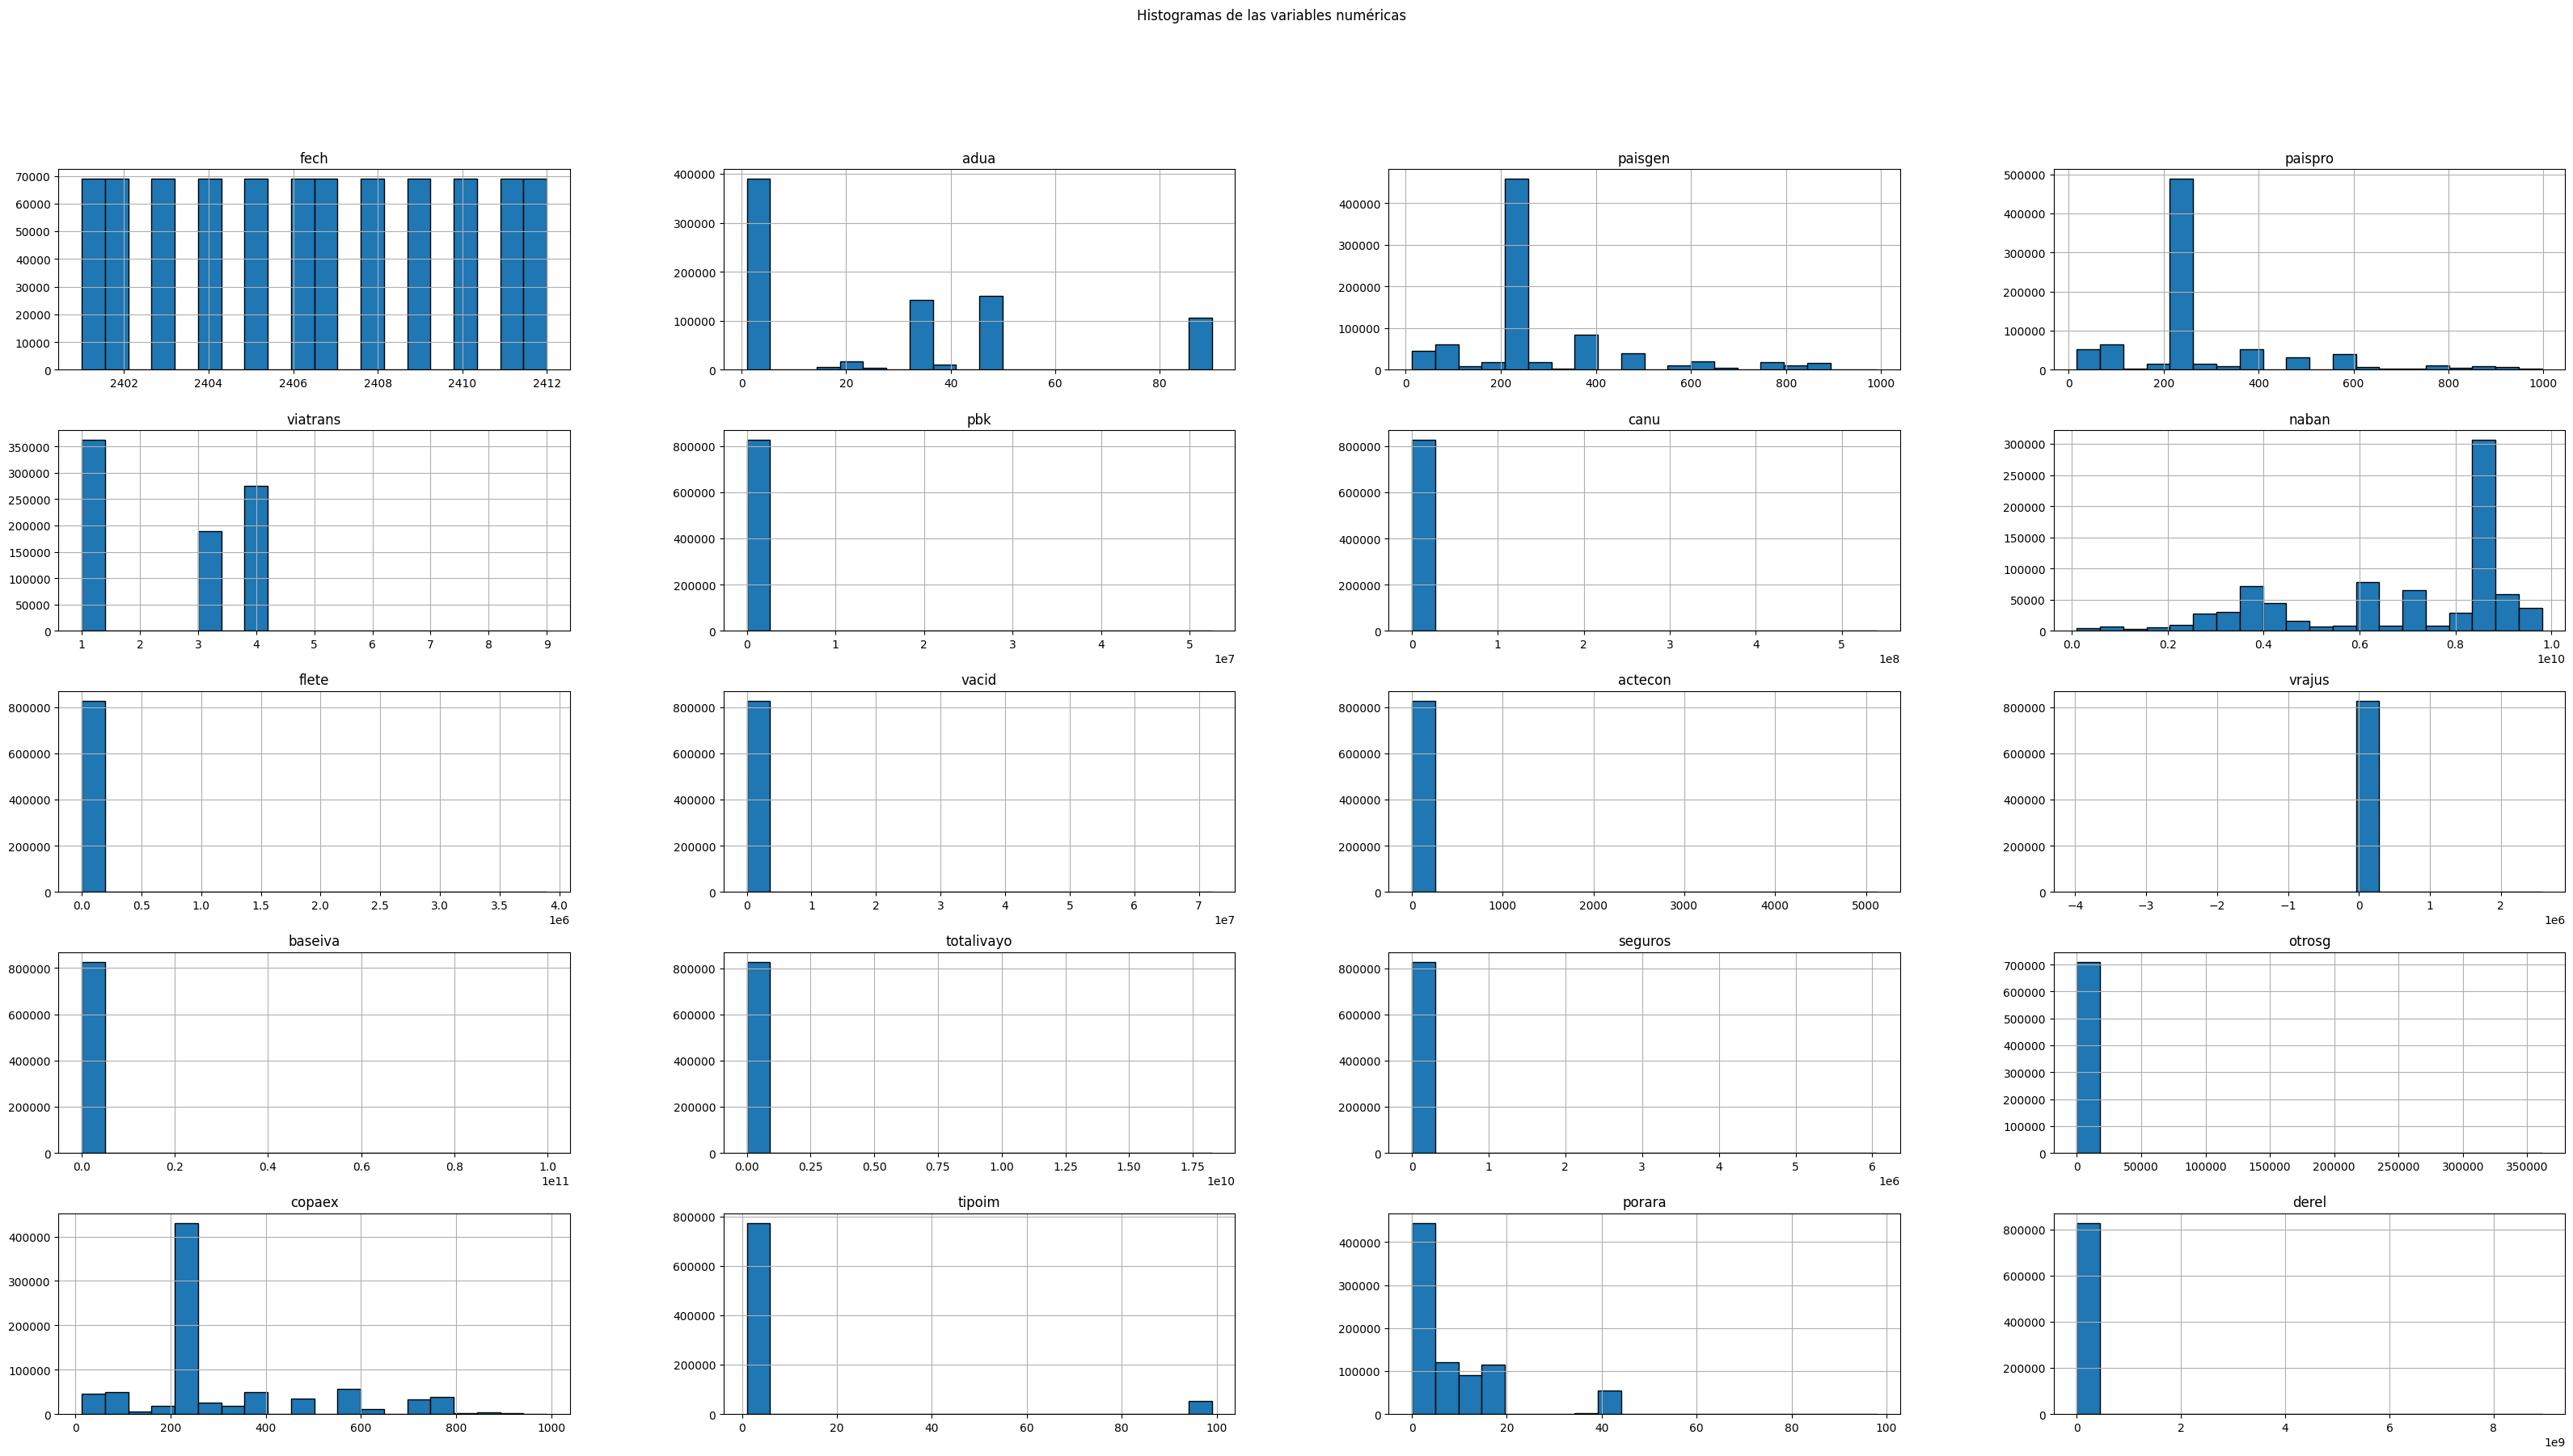

In [16]:
# Visualización de histogramas para variables numéricas restantes
dfimp24.hist(figsize=(40, 20), bins=20, edgecolor='black')
plt.suptitle("Histogramas de las variables numéricas")
plt.show()

<Axes: >

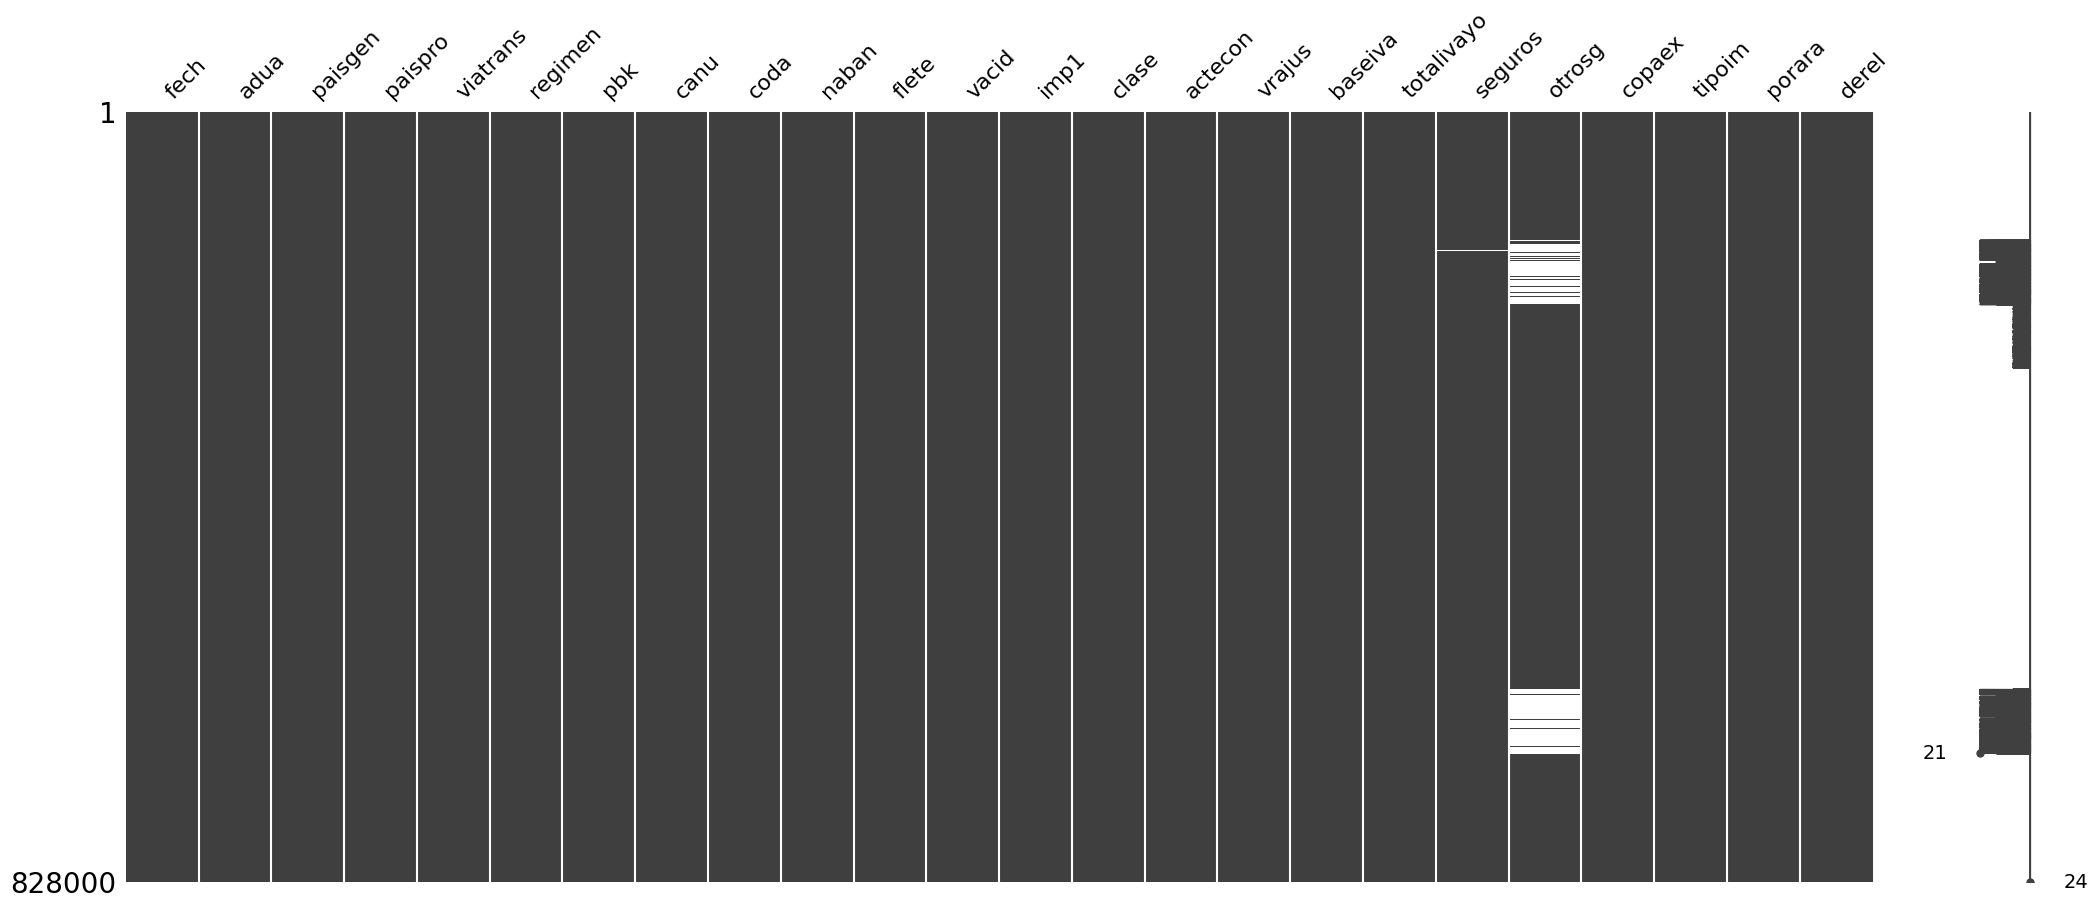

In [17]:
# Visualizacion de valores faltantes tras eliminación de columnas
msno.matrix(dfimp24)

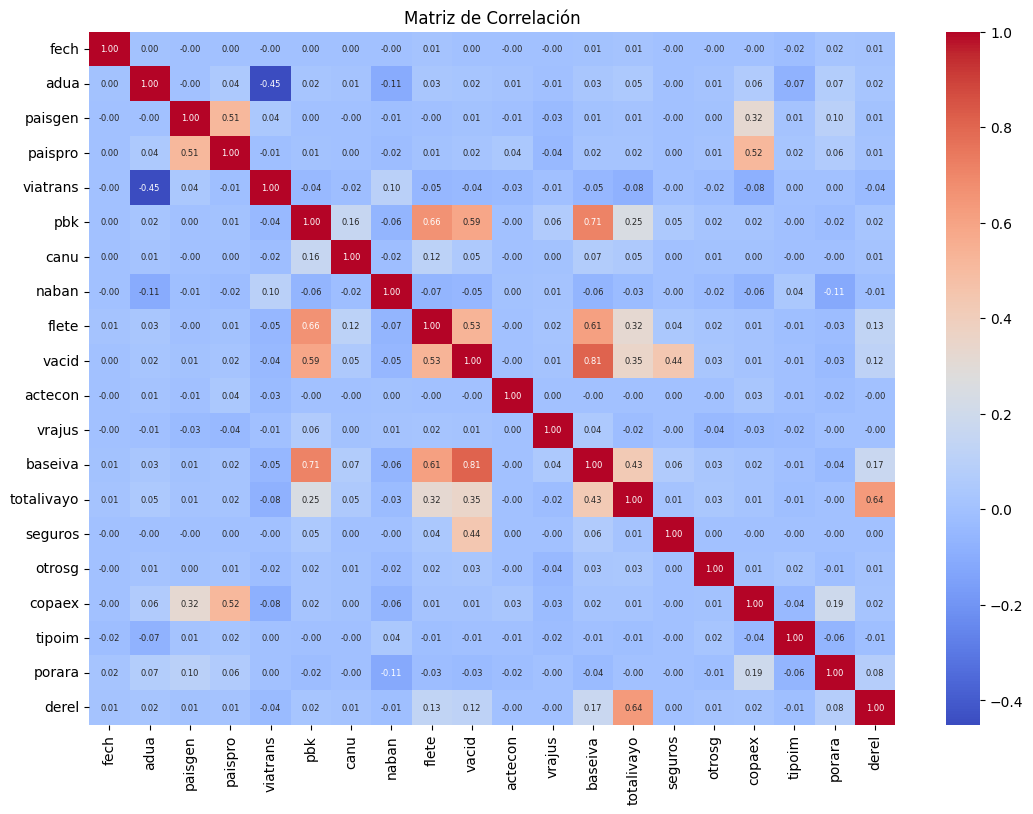

In [18]:
# Matriz de correlación
correlation_matrix = dfimp24.corr(numeric_only=True)
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6})
plt.title("Matriz de Correlación")
plt.show()

### Tratamiento de faltantes

In [19]:
# Revision de valores faltantes
for columna in dfimp24.columns:
    print(f"Columna '{columna}': {dfimp24[columna].isna().sum()} valores faltantes")

Columna 'fech': 0 valores faltantes
Columna 'adua': 0 valores faltantes
Columna 'paisgen': 0 valores faltantes
Columna 'paispro': 0 valores faltantes
Columna 'viatrans': 0 valores faltantes
Columna 'regimen': 0 valores faltantes
Columna 'pbk': 1 valores faltantes
Columna 'canu': 0 valores faltantes
Columna 'coda': 0 valores faltantes
Columna 'naban': 0 valores faltantes
Columna 'flete': 334 valores faltantes
Columna 'vacid': 0 valores faltantes
Columna 'imp1': 0 valores faltantes
Columna 'clase': 0 valores faltantes
Columna 'actecon': 0 valores faltantes
Columna 'vrajus': 0 valores faltantes
Columna 'baseiva': 0 valores faltantes
Columna 'totalivayo': 0 valores faltantes
Columna 'seguros': 521 valores faltantes
Columna 'otrosg': 117371 valores faltantes
Columna 'copaex': 0 valores faltantes
Columna 'tipoim': 0 valores faltantes
Columna 'porara': 0 valores faltantes
Columna 'derel': 0 valores faltantes


In [20]:
# Revisión específica de valores faltantes en la columna 'seguros'
dfimp24['seguros'].isna().sum()

521

In [21]:
# Se encuentran 521 registros que no tienen valor de seguro, los cuales hemos decidido eliminar, ya que son pocos en comparación con la cantidad total de datos (800mil) y pueden producir ruido en la estimación del modelo.
# Eliminar filas donde la columna 'seguros' tiene valores NaN
dfimp24 = dfimp24.dropna(subset=['seguros'])

In [22]:
# Revisión específica de valores faltantes en la columna 'otrosg'
dfimp24['otrosg'].isna().sum()

116870

In [23]:
# La columna Otros gastos 'otrosg' cuenta con 116870 datos faltantes, en ese sentido se ha considerado que estos datos faltantes significan que la importación no tuvo otros gastos y se decide poner reemplazar por el valor cero.
# Reemplazar valores NaN en la columna 'otrosg' por 0.00
dfimp24['otrosg'] = dfimp24['otrosg'].fillna(0.00)

In [24]:
# Revisión específica de valores faltantes en la columna 'pbk'
dfimp24['pbk'].isna().sum()

1

In [25]:
# La columna pbk tiene un dato faltantes, elimamos este registro.
dfimp24 = dfimp24.dropna(subset=['pbk'])

In [26]:
# La columna flete tiene 334 valores faltantes los cuales imputaremos con la media de los valores de la columna
# Imputación con la media 
imputer = SimpleImputer(strategy='mean')
dfimp24[['flete']] = imputer.fit_transform(dfimp24[['flete']])

<Axes: >

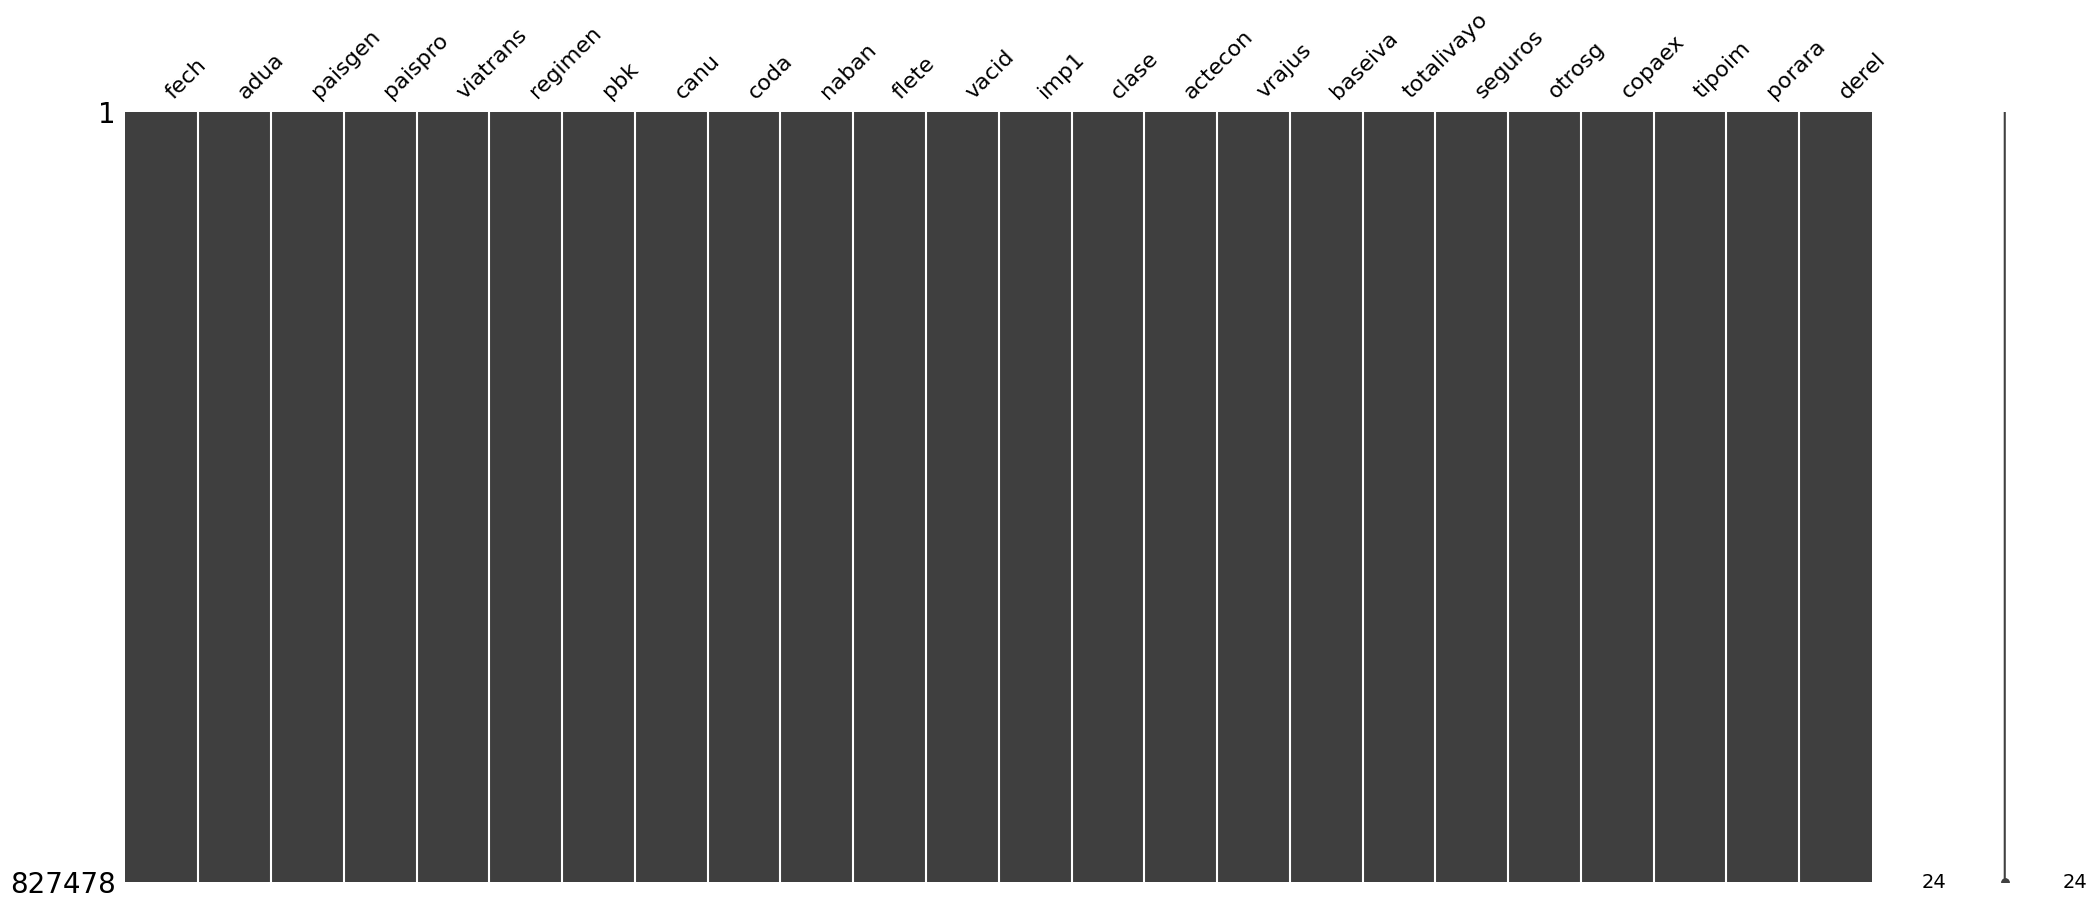

In [27]:
# Verificación final de valores faltantes
msno.matrix(dfimp24)

## Análisis Exploratorio de Datos

### Análisis de Valores Faltantes
El gráfico de matriz de valores faltantes muestra la completitud de los datos, donde se observa que la mayoría de las variables tienen una buena completitud de datos, con pocos valores faltantes.

### Distribución de Variables Numéricas
Los histogramas revelan:
- La mayoría de las variables presentan una distribución sesgada hacia la derecha (asimetría positiva)
- Hay presencia de valores atípicos en varias variables
- Algunas variables muestran una alta concentración de valores en rangos específicos

### Correlaciones
La matriz de correlación muestra:
- Alta correlación positiva entre 'vafodo' y 'baseiva'
- Correlación moderada entre 'vacip' y otras variables como 'vadua' y 'vrajus'
- Correlaciones débiles o negativas entre algunas variables, sugiriendo independencia entre ellas

Estos patrones son importantes para considerar en el modelado predictivo y en la selección de variables.

In [28]:
#Agrupar por fecha y sumar valor CIF en dolares de la mercancia
grouped = dfimp24.groupby('fech')['vacid'].sum()
print(grouped)

fech
2401.0    1.178013e+09
2402.0    1.124692e+09
2403.0    1.262302e+09
2404.0    1.383766e+09
2405.0    1.298050e+09
2406.0    1.141159e+09
2407.0    1.205479e+09
2408.0    1.187803e+09
2409.0    1.164986e+09
2410.0    1.133244e+09
2411.0    1.268564e+09
2412.0    1.361387e+09
Name: vacid, dtype: float64


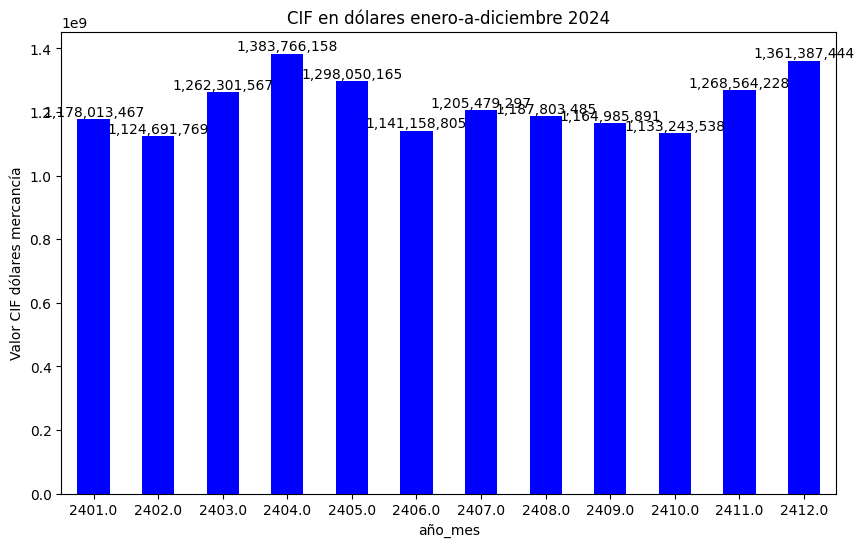

In [29]:
# Gráfico de barras de los datos agrupados

# Dibujar el gráfico de barras
ax = grouped.plot(kind='bar', color='blue', figsize=(10, 6))

# Añadir etiquetas en la parte superior de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Formato con comas, convertido a entero para eliminar decimales si hay
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición para colocar el texto
                ha='center',  # Centrado horizontalmente
                va='bottom',  # Alineado al borde superior de la barra
                fontsize=10,  # Tamaño de fuente
                color='black')  # Color del texto

# Configuraciones adicionales para el gráfico
plt.xlabel('año_mes')
plt.ylabel('Valor CIF dólares mercancía')
plt.title('CIF en dólares enero-a-diciembre 2024')
plt.xticks(rotation=0)  # Ajusta la rotación de las etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.show()

### Tratamiento variables categóricas

In [30]:
Var_categoricas= ['paisgen', 'paispro', 'viatrans', 'tipoim', 'copaex','regimen', 'coda', 'clase']

### Conversión columna clase de importador

In [31]:
mapeo_clase = {
    '1': "Mixto",
    '2': "Privado",
    '3': "Publico",
    'M': "Mixto",
    'P': "Privado"
}

mapeo_transporte = {
    1: "Maritimo",
    2: "Ferreo",
    3: "Terrestre",
    4: "Aereo",
    5: "Correo",
    7: "Instalaciones fijas",
    8: "Aguas interiores",
    9: "Otros modos"
}

mapeo_adua = {
    1: "Armenia",
    3: "Bogota",
    4: "Bucaramanga",
    10: "Manizalez",
    16: "Pereira",
    19: "Santa Marta",
    25: "Riohacha",
    27: "San Andres",
    34: "Arauca",
    35: "Buenaventura",
    36: "Cartago",
    37: "Ipiales",
    38: "Leticia",
    39: "Maicao",
    40: "Tumaco",
    41: "Uraba",
    42: "Puerto Carreño",
    43: "Inirida",
    44: "Yopal",
    46: "Puerto Asis",
    48: "Cartagena",
    49: "Valledupar",
    86: "Pamplona",
    87: "Barranquilla",
    88: "Cali",
    89: "Cucuta",
    90: "Medellin"
}

mapeo_tipo_imp = {
    1: "Reembolsable",
    2: "Donación",
    3: "Importación temporal",
    4: "Importación por reposición",
    5: "Muestra promocional",
    6: "Muestra para exhibición",
    7: "Muestra experimental",
    8: "Resto de muestras",
    9: "Otras no-reembolsables",
    99: "Sin información"
}

mapeo_regimen = {
    'C1': "Importación ordinaria",
    'C2': "Importación con franquicia",
    'C3': "Reimportación",
    'C4': "Importación temporal para reexportación en el mismo estado",
    'C5': "Importación temporal para perfeccionamiento activo",
    'C6': "Importación para transformación y/o ensamble"
}


mapeo_continente = {
    27: "América",  # Aruba
    13: "Asia",  # Afganistán
    40: "África",  # Angola
    41: "América",  # Anguilla
    15: "Europa",  # Aland, islas
    17: "Europa",  # Albania
    37: "Europa",  # Andorra
    244: "Asia",  # Emiratos Árabes Unidos
    63: "América",  # Argentina
    26: "Asia",  # Armenia
    690: "Oceanía",  # Samoa Americana
    24: "Antártida",  # Antártida
    786: "Antártida",  # Territorios Franceses del Sur
    43: "América",  # Antigua y Barbuda
    69: "Oceanía",  # Australia
    72: "Europa",  # Austria
    74: "Asia",  # Azerbaiyán
    115: "África",  # Burundi
    87: "Europa",  # Bélgica
    229: "África",  # Benin
    98: "América",  # Bonaire, San Eustatius y Saba
    31: "África",  # Burkina Faso
    81: "Asia",  # Bangladesh
    111: "Europa",  # Bulgaria
    80: "Asia",  # Bahréin
    77: "América",  # Bahamas
    29: "Europa",  # Bosnia y Herzegovina
    693: "América",  # San Bartolomé
    91: "Europa",  # Belarús
    88: "América",  # Belice
    90: "América",  # Bermudas
    97: "América",  # Bolivia
    105: "América",  # Brasil
    83: "América",  # Barbados
    108: "Asia",  # Brunei Darussalam
    119: "Asia",  # Bután
    102: "Antártida",  # Bouvet, isla
    101: "África",  # Botswana
    640: "África",  # República Centroafricana
    149: "América",  # Canadá
    165: "Asia",  # Cocos (Keeling), Islas
    767: "Europa",  # Suiza
    211: "América",  # Chile
    215: "Asia",  # China
    193: "África",  # Costa de Marfil
    145: "África",  # Camerún, República Unida del
    888: "África",  # Rep. Democrática del Congo
    177: "África",  # Congo, República del
    183: "Oceanía",  # Cook, Islas
    169: "América",  # Colombia
    173: "África",  # Comoras
    127: "África",  # Cabo Verde
    196: "América",  # Costa Rica
    199: "América",  # Cuba
    200: "América",  # Curazao
    511: "Oceanía",  # Navidad (Christmas), Isla
    137: "América",  # Caimán, Islas
    221: "Asia",  # Chipre
    644: "Europa",  # República Checa
    23: "Europa",  # Alemania
    783: "África",  # Djibouti
    235: "América",  # Dominica
    232: "Europa",  # Dinamarca
    647: "América",  # República Dominicana
    59: "África",  # Argelia
    239: "América",  # Ecuador
    240: "África",  # Egipto
    243: "África",  # Eritrea
    685: "África",  # Sahara Occidental
    245: "Europa",  # España
    251: "Europa",  # Estonia
    253: "África",  # Etiopía
    271: "Europa",  # Finlandia
    870: "Oceanía",  # Fiji
    275: "Europa",  # Francia
    259: "Europa",  # Feroe, Islas
    494: "Oceanía",  # Micronesia, Estados Federados de
    281: "África",  # Gabón
    628: "Europa",  # Reino Unido
    287: "Asia",  # Georgia
    327: "Europa",  # Guernsey
    289: "África",  # Ghana
    293: "Europa",  # Gibraltar
    329: "África",  # Guinea
    309: "América",  # Guadalupe
    285: "África",  # Gambia
    334: "África",  # Guinea Bissau
    331: "África",  # Guinea Ecuatorial
    301: "Europa",  # Grecia
    297: "América",  # Granada
    305: "América",  # Groenlandia
    317: "América",  # Guatemala
    325: "América",  # Guayana Francesa
    313: "Oceanía",  # Guam
    337: "América",  # Guyana
    351: "Asia",  # Hong Kong
    343: "Antártida",  # Heard y Mc Donald, islas
    345: "América",  # Honduras
    198: "Europa",  # Croacia
    341: "América",  # Haití
    355: "Europa",  # Hungría
    365: "Asia",  # Indonesia
    468: "Europa",  # Isla de Man
    361: "Asia",  # India
    787: "Asia",  # Territorio Británico del Océano Índico
    375: "Europa",  # Irlanda
    372: "Asia",  # Irán
    369: "Asia",  # Irak
    379: "Europa",  # Islandia
    383: "Asia",  # Israel
    386: "Europa",  # Italia
    391: "América", # Jamaica
    401: "Europa",  # Jersey
    403: "Asia",  # Jordania
    399: "Asia",  # Japón
    406: "Asia",  # Kazajstán
    410: "África",  # Kenia
    412: "Asia",  # Kirguistán
    141: "Asia",  # Camboya
    411: "Oceanía",  # Kiribati
    695: "América",  # Saint Kitts y Nevis
    190: "Asia",  # Corea del Sur
    413: "Asia",  # Kuwait
    420: "Asia",  # Laos
    431: "Asia",  # Líbano
    434: "África",  # Liberia
    438: "África",  # Libia
    715: "América",  # Santa Lucía
    440: "Europa",  # Liechtenstein
    750: "Asia",  # Sri Lanka
    426: "África",  # Lesoto
    443: "Europa",  # Lituania
    445: "Europa",  # Luxemburgo
    429: "Europa",  # Letonia
    447: "Asia",  # Macao
    698: "América",  # San Martín (parte francesa)
    474: "África",  # Marruecos
    498: "Europa",  # Mónaco
    496: "Europa",  # Moldavia
    450: "África",  # Madagascar
    461: "Asia",  # Maldivas
    493: "América",  # México
    472: "Oceanía",  # Islas Marshall
    448: "Europa",  # Macedonia
    464: "África",  # Malí
    467: "Europa",  # Malta
    93: "Asia",  # Myanmar
    500: "Europa",  # Montenegro
    497: "Asia",  # Mongolia
    469: "Oceanía",  # Islas Marianas Septentrionales
    505: "África",  # Mozambique
    488: "África",  # Mauritania
    501: "América",  # Montserrat
    477: "América",  # Martinica
    485: "África",  # Mauricio
    458: "África",  # Malawi
    455: "Asia",  # Malasia
    489: "África",  # Mayotte
    507: "África",  # Namibia
    542: "Oceanía",  # Nueva Caledonia
    525: "África",  # Níger
    535: "Oceanía",  # Isla Norfolk
    528: "África",  # Nigeria
    521: "América",  # Nicaragua
    531: "Oceanía",  # Niue
    573: "Europa",  # Países Bajos
    538: "Europa",  # Noruega
    517: "Asia",  # Nepal
    508: "Oceanía",  # Nauru
    548: "Oceanía",  # Nueva Zelanda
    556: "Asia",  # Omán
    576: "Asia",  # Pakistán
    580: "América",  # Panamá
    593: "Oceanía",  # Isla Pitcairn
    589: "América",  # Perú
    267: "Asia",  # Filipinas
    578: "Oceanía",  # Islas Palaos
    545: "Oceanía",  # Papúa Nueva Guinea
    603: "Europa",  # Polonia
    611: "América",  # Puerto Rico
    187: "Asia",  # Corea del Norte
    607: "Europa",  # Portugal
    586: "América",  # Paraguay
    579: "Asia",  # Palestina
    599: "Oceanía",  # Polinesia Francesa
    618: "Asia",  # Catar (Qatar)
    660: "África",  # Reunión
    670: "Europa",  # Rumania
    676: "Europa",  # Rusia
    675: "África",  # Ruanda
    53: "Asia",  # Arabia Saudita
    759: "África",  # Sudán
    728: "África",  # Senegal
    741: "Asia",  # Singapur
    710: "África",  # Santa Elena
    772: "Europa",  # Svalbard y Jan Mayen
    677: "Oceanía",  # Islas Salomón
    735: "África",  # Sierra Leona
    242: "América",  # El Salvador
    697: "Europa",  # San Marino
    748: "África",  # Somalia
    700: "América",  # San Pedro y Miguelón
    729: "Europa",  # Serbia
    760: "África",  # Sudán del Sur
    720: "África",  # Santo Tomé y Príncipe
    770: "América",  # Surinam
    246: "Europa",  # Eslovaquia
    247: "Europa",  # Eslovenia
    764: "Europa",  # Suecia
    773: "África",  # Swazilandia (actual Esuatini)
    699: "América",  # San Martín (Parte Holandesa)
    731: "África",  # Seychelles
    744: "Asia",  # Siria
    823: "América",  # Islas Turcas y Caicos
    203: "África",  # Chad
    800: "África",  # Togo
    776: "Asia",  # Tailandia
    774: "Asia",  # Tayikistán
    805: "Oceanía",  # Tokelau
    825: "Asia",  # Turkmenistán
    788: "Asia",  # Timor del Este
    810: "Oceanía",  # Tonga
    815: "América",  # Trinidad y Tobago
    820: "África",  # Túnez
    827: "Asia",  # Turquía
    828: "Oceanía",  # Tuvalu
    218: "Asia",  # Taiwán
    780: "África",  # Tanzania
    833: "África",  # Uganda
    830: "Europa",  # Ucrania
    566: "América",  # Islas Ultramarinas Menores de EE.UU.
    845: "América",  # Uruguay
    249: "América",  # Estados Unidos
    847: "Asia",  # Uzbekistán
    159: "Europa",  # Santa Sede (Vaticano)
    705: "América",  # San Vicente y las Granadinas
    850: "América",  # Venezuela
    863: "América",  # Islas Vírgenes Británicas
    866: "América",  # Islas Vírgenes de EE.UU.
    855: "Asia",  # Vietnam
    551: "Oceanía",  # Vanuatu
    875: "Oceanía",  # Wallis y Futuna
    687: "Oceanía",  # Samoa
    129: "América",  # ZFP Zofrandina
    130: "América",  # ZFPE Colmotores Zoficol
    131: "América",  # ZFPE Tablemac Sas
    132: "América",  # ZFPE Fundación Cardiovascular
    133: "América",  # ZFPE Aceites Cimarrones
    134: "América",  # ZFPE Puerto Brisa
    135: "América",  # ZFPE Clínica Cardiovascular Corazón Joven
    620: "América",  # ZFPE Puerto Industrial Agua Dulce
    621: "América",  # ZFP INTERNACIONAL VALLE DE ABURRÁ
    622: "América",  # ZFPE Fresenius Medical Care
    623: "América",  # ZFPE Destilería Riopaila
    624: "América",  # ZFPE Puerto Bahía
    625: "América",  # ZFPE Medical DUARTE
    626: "América",  # ZFPE Sociedad Portuaria Regional de Buenaventura
    631: "América",  # ZFP Palermo
    633: "América",  # ZFP FEMSA
    634: "América",  # ZFPE SYKES
    635: "América",  # ZFPE Sociedad Portuaria Puerto Nuevo
    636: "América",  # ZFPE Termotasajero Dos S.A.
    637: "América",  # ZFPE Sociedad Portuaria Mardique S.A.
    638: "América",  # ZFPE GETCOM
    650: "América",  # ZFPE Centro Hospitalario Serena Del Mar S.A.
    651: "América",  # ZFPE PUERTO MAMONAL SOCIEDAD PORTUARIA
    653: "América",  # ZFPE AGROINDUSTRIAL ACEITES GRASAS DEL CATATUMBO
    655: "América",  # ZFPE Plaza Mayor Convenciones y Exposiciones
    902: "América",  # ZFPE Gecelca 3.
    903: "América",  # ZFPE CEMENTERA DEL MAGDALENA MEDIO.
    904: "América",  # ZFPE Estractora la Gloria.
    905: "América",  # ZFPE Olmue.
    907: "América",  # ZFP Centro Logístico del Pacífico CELPA.
    911: "América",  # ZFP de Barranquilla
    913: "América",  # ZFP de Palmaseca
    914: "América",  # ZFP de Cúcuta
    915: "América",  # ZFP de Santa Marta
    916: "América",  # ZFP de Cartagena
    917: "América",  # ZFP de Rionegro
    918: "América",  # ZFP de la Candelaria
    919: "América",  # ZFP de Bogotá
    920: "América",  # ZFP de Pacífico
    924: "América",  # ZFP Eje Cafetero
    925: "América",  # ZFPE Cervecería del Valle
    926: "América",  # ZFP Agroindustrial del Magdalena Medio
    928: "América",  # ZFP La Cayena
    929: "América",  # ZFP Internacional del Atlántico
    930: "América",  # ZFPE BIO D FACATATIVA
    931: "América",  # ZFPE Biocombustibles Sostenibles del Caribe
    933: "América",  # ZFPE Agroindustrial del Cauca
    934: "América",  # ZFP Parque Industrial Dexton
    935: "América",  # ZFPE Argos S.A
    936: "América",  # ZFPE Gyplac S.A
    937: "América",  # ZFPE Kcag
    939: "América",  # ZFP Intexzona
    940: "América",  # ZFP Tayrona S.A
    941: "América",  # ZFP de Urabá S.A
    942: "América",  # ZFPE Corferias.
    943: "América",  # ZFP Las Américas
    944: "América",  # ZFPE Ecodiesel S.A
    945: "América",  # ZFPE Estrategias Contac-Center
    948: "América",  # ZFPE Pepsico Alimentos Ltda
    950: "América",  # ZFPE de Servicios Marinilla
    951: "América",  # ZFPE Vidrio Andino
    953: "América",  # ZFPE Refinería de Cartagena
    954: "América",  # ZFP de Occidente S.A
    955: "América",  # ZFPE Sociedad Portuaria de Santa Marta
    956: "América",  # ZFPE de Servicios "CONTECAR"
    957: "América",  # ZFPE Colombina del Cauca
    958: "América",  # ZFPE Termoflores
    959: "América",  # ZFPE Papelfibras (Propal)
    960: "América",  # ZFP de Tocancipá
    961: "América",  # ZFPE Telemark Spain
    962: "América",  # ZFPE San Vicente de Paul
    963: "América",  # ZFPE Cerámicas San Lorenzo
    964: "América",  # ZFPE Papeles del Cauca
    965: "América",  # ZFPE Clínica Porto Azul
    966: "América",  # ZFP Santander
    967: "América",  # ZFPE Protisa
    968: "América",  # ZFPE Praxair
    969: "América",  # ZFPE Cencauca (Parque Industrial Caloto)
    972: "América",  # ZFPE Econtac
    973: "América",  # ZFPE Clínica los Nogales
    974: "América",  # ZFP Metropolitana
    976: "América",  # ZFPE Bioenergy
    977: "América",  # ZFP Puerta de las Américas
    979: "América",  # ZFPE Productos Familia (Cajicá)
    980: "América",  # ZFPE Sociedad Portuaria Regional de Barranquilla
    981: "América",  # ZFPE Fundación Fosunab
    982: "América",  # ZFPE Alimentos Nariño
    983: "América",  # ZFPE Convergys
    984: "América",  # ZFPE Procesadora de Aceite Ororojo
    985: "América",  # ZFP Internacional de Pereira
    987: "América",  # ZFP Brisa
    988: "América",  # ZFPE Loma Fresca
    989: "América",  # ZFP Parque Central
    991: "América",  # ZFP Conjunto Industrial Parque Sur
    996: "América",  # ZFPE Compañía Operadora Clínica Hispanoamericana
    997: "América",  # ZFP SurColombiana
    998: "América",  # ZFPE Sociedad Portuaria Regional de Cartagena
    880: "Asia",      # Yemen
    756: "África",    # Sudáfrica
    890: "África",    # Zambia
    665: "África",    # Zimbabue
    999: "No declarado"  # No Declarados
}

map_fechas = {
    2401.0: 1,
    2402.0: 2,
    2403.0: 3,
    2404.0: 4,
    2405.0: 5,
    2406.0: 6,
    2407.0: 7,
    2408.0: 8,
    2409.0: 9,
    2410.0: 10,
    2411.0: 11,
    2412.0: 12,
}

map_aduanas_agrupadas = {
    'Cartagena' : 'Maritima y Fluvial',
    'Buenaventura' : 'Maritima y Fluvial',
    'Santa Marta' : 'Maritima y Fluvial',
    'Barranquilla' : 'Maritima y Fluvial',
    'Uraba' : 'Maritima y Fluvial',
    'Bogota' : 'Aereas y Terrestres',
    'Medellin' : 'Aereas y Terrestres',
    'Cali' : 'Aereas y Terrestres',
    'Pereira' : 'Aereas y Terrestres',
    'Bucaramanga' : 'Aereas y Terrestres',
    'Manizales' : 'Aereas y Terrestres',
    'Armenia' : 'Aereas y Terrestres',
    'Yopal' : 'Aereas y Terrestres',
    'Puerto Asis' : 'Aereas y Terrestres',
    'Leticia' : 'Aereas y Terrestres',
    'Maicao' : 'Aereas y Terrestres',
    'Ipiales' : 'Aereas y Terrestres',
    'Cucuta' : 'Aereas y Terrestres',
    'Manizalez' : 'Aereas y Terrestres',
    'Riohacha' : 'Aereas y Terrestres'
}


dfimp24['fech'] = dfimp24['fech'].map(map_fechas)

dfimp24 = dfimp24.drop(dfimp24[dfimp24['copaex'] == 216].index)
dfimp24['copaex'] = dfimp24['copaex'].map(mapeo_continente)

dfimp24['paisgen'] = dfimp24['paisgen'].map(lambda x: mapeo_continente.get(x, x))
dfimp24 = dfimp24.drop(dfimp24[dfimp24['paisgen'].isin([226, 216, 217, 654])].index)

dfimp24 = dfimp24.drop(dfimp24[dfimp24['paispro'].isin([226, 216, 217, 654])].index)
dfimp24['paispro'] = dfimp24['paispro'].map(lambda x: mapeo_continente.get(x, x))


dfimp24['regimen'] = dfimp24['regimen'].str[:2].map(mapeo_regimen).fillna("Otros")

dfimp24['clase'] = dfimp24['clase'].map(mapeo_clase).fillna("OtrasClases")
dfimp24['viatrans'] = dfimp24['viatrans'].map(mapeo_transporte)

dfimp24 = dfimp24.drop(dfimp24[dfimp24['adua'] == 24].index)
dfimp24['adua'] = dfimp24['adua'].map(mapeo_adua)
dfimp24['adua'] = dfimp24['adua'].map(map_aduanas_agrupadas)


dfimp24['tipoim'] = dfimp24['tipoim'].map(mapeo_tipo_imp)

### Creación de nuevas variables

In [32]:
dfimp24['trimestre'] = np.select(
    [
        dfimp24['fech'].between(1, 3),   # Trimestre 1
        dfimp24['fech'].between(4, 6),   # Trimestre 2
        dfimp24['fech'].between(7, 9),   # Trimestre 3
        dfimp24['fech'].between(10, 12)  # Trimestre 4
    ],
    [1, 2, 3, 4]  # Asigna los valores de trimestre
)

In [33]:
df_copy = dfimp24.copy()
df_copy.drop(columns='naban', inplace=True) # Posición aranceralia
df_copy.drop(columns='coda', inplace=True) # Medida de la mercancia
df_copy.drop(columns='actecon', inplace=True) # Actividad economica solo tiene valores 0 y 5121
df_copy.drop(columns='imp1', inplace=True)

In [34]:
df_copy.head()

,fech,adua,paisgen,paispro,viatrans,regimen,pbk,canu,flete,vacid,...,vrajus,baseiva,totalivayo,seguros,otrosg,copaex,tipoim,porara,derel,trimestre
0,1,Aereas y Terrestres,Europa,Europa,Aereo,Importación ordinaria,4.30,3.87,20.63,500.32,...,0.0,1966153.0,0.0,2.39,0.00,Europa,Reembolsable,0.0,0,1
1,1,Maritima y Fluvial,Asia,Asia,Maritimo,Importación ordinaria,1715.90,289.00,494.33,13678.87,...,0.0,59131087.0,16611000.0,8.33,0.00,Asia,Reembolsable,10.0,5376000,1
2,1,Aereas y Terrestres,América,América,Maritimo,Importación ordinaria,58.43,4.00,29.37,1919.58,...,0.0,7916419.0,1881000.0,0.23,0.00,América,Sin información,5.0,377000,1
3,1,Maritima y Fluvial,Asia,Asia,Maritimo,Importación ordinaria,445.90,158.00,214.33,3408.06,...,0.0,14328776.0,4025000.0,0.39,33.34,Asia,Sin información,10.0,1303000,1
4,1,Aereas y Terrestres,Asia,Europa,Terrestre,Importación con franquicia,448.15,2592.00,143.59,1321.92,...,0.0,2526222.0,960000.0,0.40,0.00,Europa,Reembolsable,0.0,0,1


In [35]:
df_copy['fech'].value_counts()

fech
1     68999
2     68999
6     68999
5     68998
8     68997
9     68997
4     68996
7     68996
11    68991
12    68989
10    68803
3     68664
Name: count, dtype: int64

### Creación de nuevas variable

Si usamos "fech" directamente como un número (1-12), el modelo tratará de interpretar enero (1) y diciembre (12) como si fueran muy diferentes, cuando en realidad están muy cerca (porque el tiempo es cíclico).


Esto convierte el mes en una representación cíclica en un círculo unitario, lo que permite al modelo detectar patrones estacionales de manera más efectiva.

In [36]:
df_copy['sin_fech'] = np.sin(2 * np.pi * df_copy['fech'] / 12)
df_copy['cos_fech'] = np.cos(2 * np.pi * df_copy['fech'] / 12)

In [37]:
df_copy.head()

,fech,adua,paisgen,paispro,viatrans,regimen,pbk,canu,flete,vacid,...,totalivayo,seguros,otrosg,copaex,tipoim,porara,derel,trimestre,sin_fech,cos_fech
0,1,Aereas y Terrestres,Europa,Europa,Aereo,Importación ordinaria,4.30,3.87,20.63,500.32,...,0.0,2.39,0.00,Europa,Reembolsable,0.0,0,1,0.5,0.866025
1,1,Maritima y Fluvial,Asia,Asia,Maritimo,Importación ordinaria,1715.90,289.00,494.33,13678.87,...,16611000.0,8.33,0.00,Asia,Reembolsable,10.0,5376000,1,0.5,0.866025
2,1,Aereas y Terrestres,América,América,Maritimo,Importación ordinaria,58.43,4.00,29.37,1919.58,...,1881000.0,0.23,0.00,América,Sin información,5.0,377000,1,0.5,0.866025
3,1,Maritima y Fluvial,Asia,Asia,Maritimo,Importación ordinaria,445.90,158.00,214.33,3408.06,...,4025000.0,0.39,33.34,Asia,Sin información,10.0,1303000,1,0.5,0.866025
4,1,Aereas y Terrestres,Asia,Europa,Terrestre,Importación con franquicia,448.15,2592.00,143.59,1321.92,...,960000.0,0.40,0.00,Europa,Reembolsable,0.0,0,1,0.5,0.866025


Variable objetivo: VACID (Valor CIF de importaciones).

Variables predictoras: Todas las demás características, transformadas correctamente.

Enfoque: Regresión supervisada para predecir el valor total de importaciones en enero.

## Modelos Lineales y Árboles de Decisión

In [38]:
# Lista de variables categóricas a codificar con One-Hot Encoding
categorical_cols = ['adua', 'paisgen', 'paispro', 'viatrans', 'regimen', 'clase', 'copaex', 'tipoim']

# Aplicar One-Hot Encoding
df_copy_one_hot_encoding = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

In [39]:
df_copy_one_hot_encoding.head()

,fech,pbk,canu,flete,vacid,vrajus,baseiva,totalivayo,seguros,otrosg,...,copaex_Oceanía,copaex_África,tipoim_Importación por reposición,tipoim_Importación temporal,tipoim_Muestra experimental,tipoim_Muestra para exhibición,tipoim_Muestra promocional,tipoim_Reembolsable,tipoim_Resto de muestras,tipoim_Sin información
0,1,4.30,3.87,20.63,500.32,0.0,1966153.0,0.0,2.39,0.00,...,False,False,False,False,False,False,False,True,False,False
1,1,1715.90,289.00,494.33,13678.87,0.0,59131087.0,16611000.0,8.33,0.00,...,False,False,False,False,False,False,False,True,False,False
2,1,58.43,4.00,29.37,1919.58,0.0,7916419.0,1881000.0,0.23,0.00,...,False,False,False,False,False,False,False,False,False,True
3,1,445.90,158.00,214.33,3408.06,0.0,14328776.0,4025000.0,0.39,33.34,...,False,False,False,False,False,False,False,False,False,True
4,1,448.15,2592.00,143.59,1321.92,0.0,2526222.0,960000.0,0.40,0.00,...,False,False,False,False,False,False,False,True,False,False


In [40]:
X = df_copy_one_hot_encoding.drop(columns=['vacid'])
y = df_copy_one_hot_encoding['vacid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Regresión lineal

In [41]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicción
y_pred_lr = modelo_lr.predict(X_test)

In [42]:
# Evaluación del modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_lr}, RMSE: {rmse_lr}, R2: {r2_lr}")

MAE: 3108.2161669296256, RMSE: 741576248.2583088, R2: 0.9590546905242625


#### Modelo Ridge

In [43]:
# Modelo Ridge
modelo_ridge = Ridge(alpha=1.0)  # Ajusta alpha para más regularización
modelo_ridge.fit(X_train, y_train)

y_pred_ridge = modelo_ridge.predict(X_test)



# Modelo Lasso
#modelo_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio = 0.5 es mitad Ridge, mitad Lasso
#modelo_elastic.fit(X_train, y_train)

#y_pred_elastic = modelo_elastic.predict(X_test)

In [44]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE: {mae_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")

MAE: 3108.2048927136407, RMSE: 741573982.5749421, R2: 0.9590548156214549


#### Modelo Lasso

In [45]:
# Modelo Lasso
modelo_lasso = Lasso(alpha=0.01) 
modelo_lasso.fit(X_train, y_train)

y_pred_lasso = modelo_lasso.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.797e+12, tolerance: 3.204e+12
  model = cd_fast.enet_coordinate_descent(


In [46]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MAE: {mae_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")

MAE: 3108.17903448716, RMSE: 741575517.5336748, R2: 0.959054730870412


#### Modelo Regresion Lineal - Forward

In [ ]:
# Modelo de regresion con Forward Selection
# Aplicar Forward Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_base = LinearRegression()
sfs = SequentialFeatureSelector(modelo_base, direction="forward", n_features_to_select="auto", cv=5)
sfs.fit(X_train, y_train)

# Variables seleccionadas
selected_features = X_train.columns[sfs.get_support()]
print("Variables seleccionadas:", list(selected_features))

# Entrenar el modelo con las variables seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

modelo_final = LinearRegression()
modelo_final.fit(X_train_selected, y_train)

# Hacer predicciones
y_pred = modelo_final.predict(X_test_selected)

# Evaluar el modelo
mae_rg_forward = mean_absolute_error(y_test, y_pred)
rmse_rg_forward = mean_squared_error(y_test, y_pred)
r2_rg_forward = r2_score(y_test, y_pred)

print(f"MAE: {mae_rg_forward}, RMSE: {rmse_rg_forward}, R2: {r2_rg_forward}")

#### PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar solo con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Solo transformamos X_test

# Aplicar PCA con los datos de entrenamiento
pca = PCA(n_components=0.95)  # Mantener 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Aplicamos PCA también a los datos de prueba

# Mostrar la varianza explicada acumulada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()

In [ ]:
# Entrenar el modelo de Regresión Lineal con los datos transformados
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_pca, y_train)

# Predicción
y_pred_lr = modelo_lr.predict(X_test_pca)

# Evaluación del modelo
mae_pca = mean_absolute_error(y_test, y_pred_lr)
rmse_pca = mean_squared_error(y_test, y_pred_lr)
r2_pca = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_pca}, RMSE: {rmse_pca}, R2: {r2_pca}")

#### PLS

In [47]:
# Aplicar PLS con 10 componentes
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)

# Predicción
y_pred_pls = pls.predict(X_test)

# Evaluar el desempeño del modelo con PLS
mae_pls = mean_absolute_error(y_test, y_pred_pls)
rmse_pls = mean_squared_error(y_test, y_pred_pls)
r2_pls = r2_score(y_test, y_pred_pls)

print(f"MAE: {mae_pls}, RMSE: {rmse_pls}, R2: {r2_pls}")

MAE: 3110.704668717016, RMSE: 741688559.394689, R2: 0.9590484893895208


#### Modelo Arbol de Decision

In [48]:
modelo_dt = DecisionTreeRegressor(max_depth=5, random_state=42)  # Ajusta max_depth según sea necesario
modelo_dt.fit(X_train, y_train)

# Predicción
y_pred_dt = modelo_dt.predict(X_test)

# Evaluación del Modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt)  # RMSE
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Árbol de Decisión - MAE: {mae_dt}, RMSE: {rmse_dt}, R2: {r2_dt}")

Árbol de Decisión - MAE: 14969.429185166544, RMSE: 2543844631.3573265, R2: 0.8595444420802993


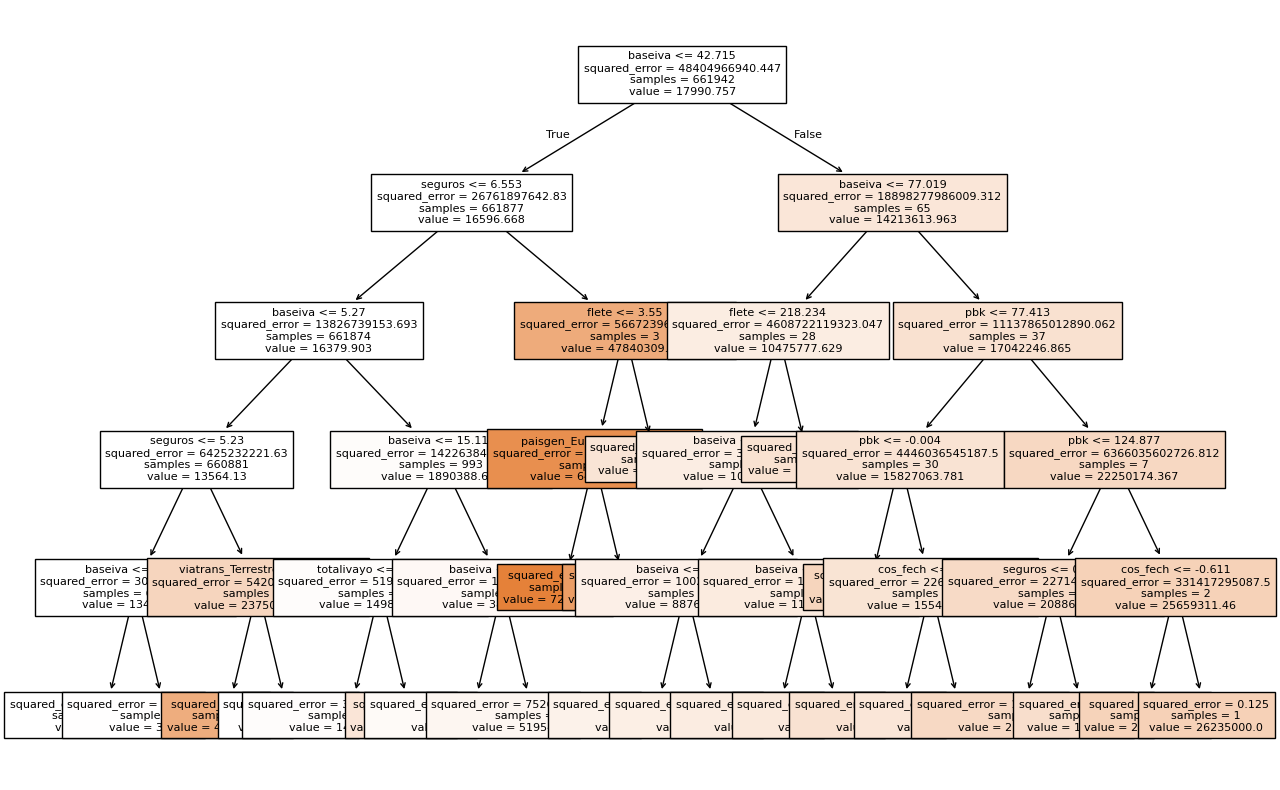

In [49]:
plt.figure(figsize=(15, 10))
plot_tree(modelo_dt, feature_names=X.columns, filled=True, fontsize=8)
plt.show()